In [2]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lightkurve import search_lightcurve

C:\Users\diarm\miniconda3\envs\TESSProject\Lib\site-packages\lightkurve\prf\__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


With the basic introduction finished, I want to work with some examples.<br><br>Today we will detect an exoplanet transit.<br><br>The planet we will discover today is LTT 9779b, also known as Cuancóa. It's a pretty cool planet (not literally as it's over 2200 degrees), and is the most reflective known planet. It may have clouds of silica or metal in the atmosphere! Moderately worse weather than Ireland. Here's the archive entry: https://exoplanetarchive.ipac.caltech.edu/overview/LTT%209779%20b#planet_LTT-9779-b_collapsible<br><br> Our goals are going to be to:<br> * Use Box Least Squares (BLS) for transit detection. * Phase-folding light curves and plotting. * Estimating the planets radius (and maybe other params too)


In [3]:
search_lcf = lk.search_lightcurve('TIC183985250', author="SPOC", exptime=120) # search for parent star, narrow down search to just SPOC lightcurves, with 2 minute cadence
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 02,2018,SPOC,120,183985250,0.0
1,TESS Sector 29,2020,SPOC,120,183985250,0.0
2,TESS Sector 69,2023,SPOC,120,183985250,0.0
3,TESS Sector 96,2025,SPOC,120,183985250,0.0


In [4]:
lcf = search_lcf.download_all()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized pdcsap_flux'>

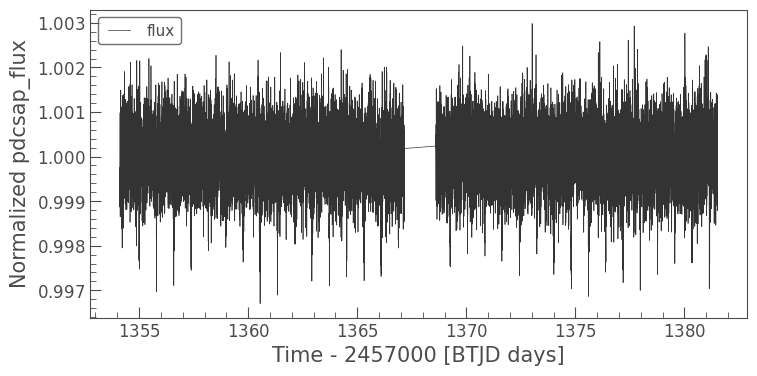

In [5]:
flat_lcf = lcf[0].flatten(window_length=401)
flat_lcf.plot(column='pdcsap_flux', normalize=True, label="flux")

So the big ole gap in the middle is most likely because TESS is downlinking data. There are also some consistently spaced dips. These could be the transits.

Best period: 0.7920 d days


<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

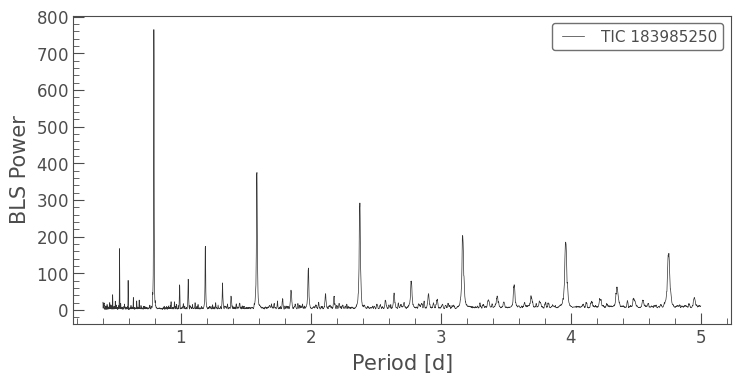

In [6]:
periodogram = flat_lcf.to_periodogram(method='bls', period=np.arange(0.4, 5, 0.001))

period = periodogram.period_at_max_power
print(f"Best period: {period:.4f} days")

periodogram.plot()

We use BLS (Box least squared) and a periodogram to identify the period. How BLS works is it trials a bunch of different values for the orbital period. For each of the values, it sees how well the signal fits to a box model. Transits show a characteristic box shaped dip in flux. It gives each value a power based on how well the box model fits. Our periodogram shows those values graphed. The highest spike is our predicted period. There are also spikes at 2 times the period, half the period, etc. <br><br>We predict the period to be 0.7920 days. This is accurate, as we can check the calculated period in the database.

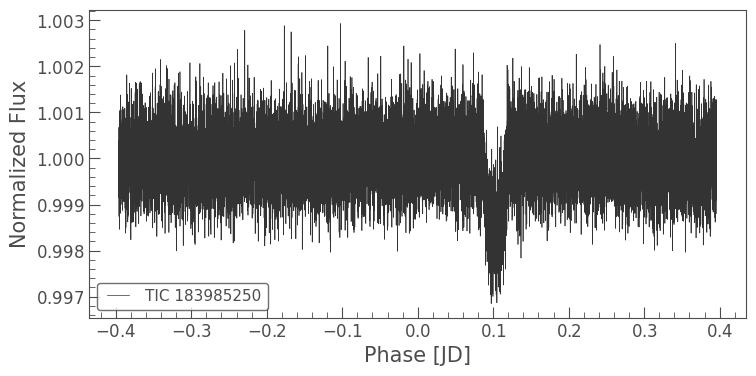

In [7]:
#phase folding goes here.
folded_lc = flat_lcf.fold(period=0.7920)
folded_lc.plot();

We can see the transit more clearly when we do phase folding. Once we know the period we can "wrap" the data around that period, showing the dip very clearly.<br><br>Next, we want to calculate the planet radius.